In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset 
df=pd.read_csv('exams.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,83,87,90
1,female,group C,associate's degree,standard,none,64,70,74
2,male,group B,some college,free/reduced,completed,67,61,64
3,female,group C,associate's degree,standard,none,69,71,68
4,female,group C,bachelor's degree,free/reduced,none,51,70,70
...,...,...,...,...,...,...,...,...
995,female,group C,some high school,standard,none,55,60,58
996,female,group D,some college,free/reduced,none,46,57,60
997,female,group E,associate's degree,standard,none,74,63,65
998,female,group C,master's degree,standard,none,67,78,78


In [5]:
df.shape

(1000, 8)

In [6]:
#check missing values 
df.isnull().sum()
#no null values are there 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()
#no duplicates are there 

0

In [9]:
#check the datatypes present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#check the no of values unique in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  72
writing score                  72
dtype: int64

In [11]:
# check the statistics of the dataset 
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.179000,70.335000,69.129000
std,15.284914,14.760306,15.192076
min,14.000000,25.000000,23.000000
25%,56.000000,60.000000,58.750000
50%,68.000000,71.000000,70.000000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


# insights from the description
## 1.all means are very close to each other betweeen 66 and 69
## 2.all the standard deviations are also close between 14.6 to 15.9
## 3.while there is a 0 for minimum in maths other are having 17 and 10 values |

In [12]:
#explore more info about the data

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,83,87,90
1,female,group C,associate's degree,standard,none,64,70,74
2,male,group B,some college,free/reduced,completed,67,61,64
3,female,group C,associate's degree,standard,none,69,71,68
4,female,group C,bachelor's degree,free/reduced,none,51,70,70


# differentitate the numerical and categorical variables separately

In [13]:
#these are bassically numerical variables 
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [14]:
#segregate numerical and categorical features 
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [15]:
numerical_features

['math score', 'reading score', 'writing score']

In [16]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
df['gender'].value_counts()

gender
male      507
female    493
Name: count, dtype: int64

In [18]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    341
group D    257
group B    201
group E    125
group A     76
Name: count, dtype: int64

In [19]:
#aggregate the total score with mean

df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some college,standard,none,83,87,90,260,86.666667
1,female,group C,associate's degree,standard,none,64,70,74,208,69.333333
2,male,group B,some college,free/reduced,completed,67,61,64,192,64.000000
3,female,group C,associate's degree,standard,none,69,71,68,208,69.333333
4,female,group C,bachelor's degree,free/reduced,none,51,70,70,191,63.666667


# explore the more visualisation

<Axes: xlabel='average', ylabel='Count'>

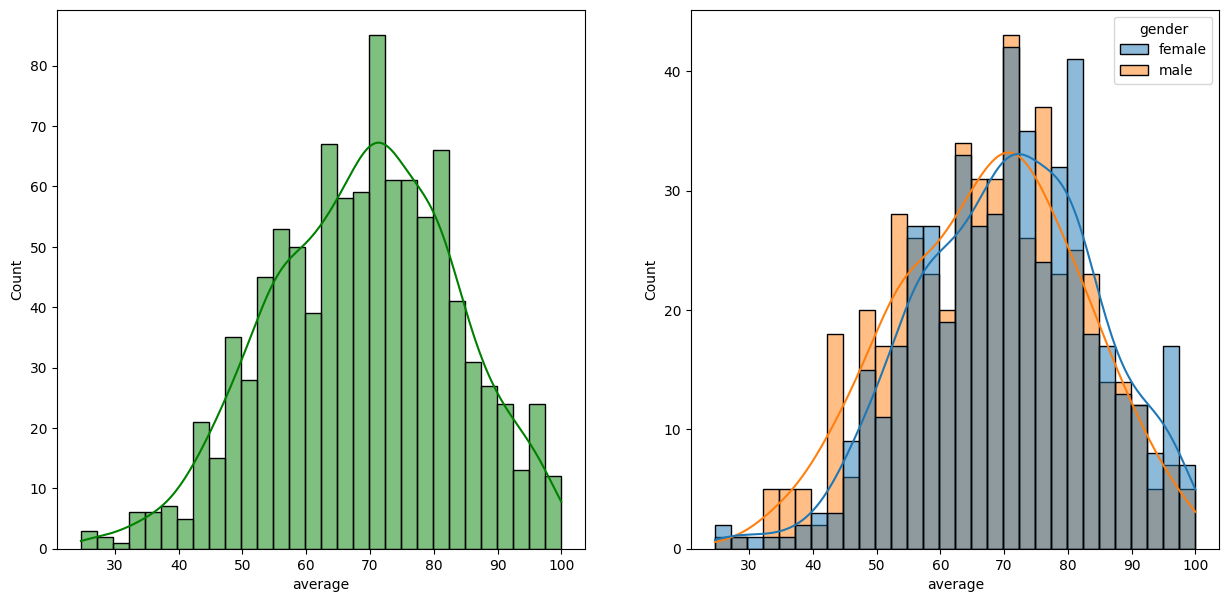

In [20]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

# insights from the graph
## boys are performing well than girls

<Axes: xlabel='average', ylabel='Count'>

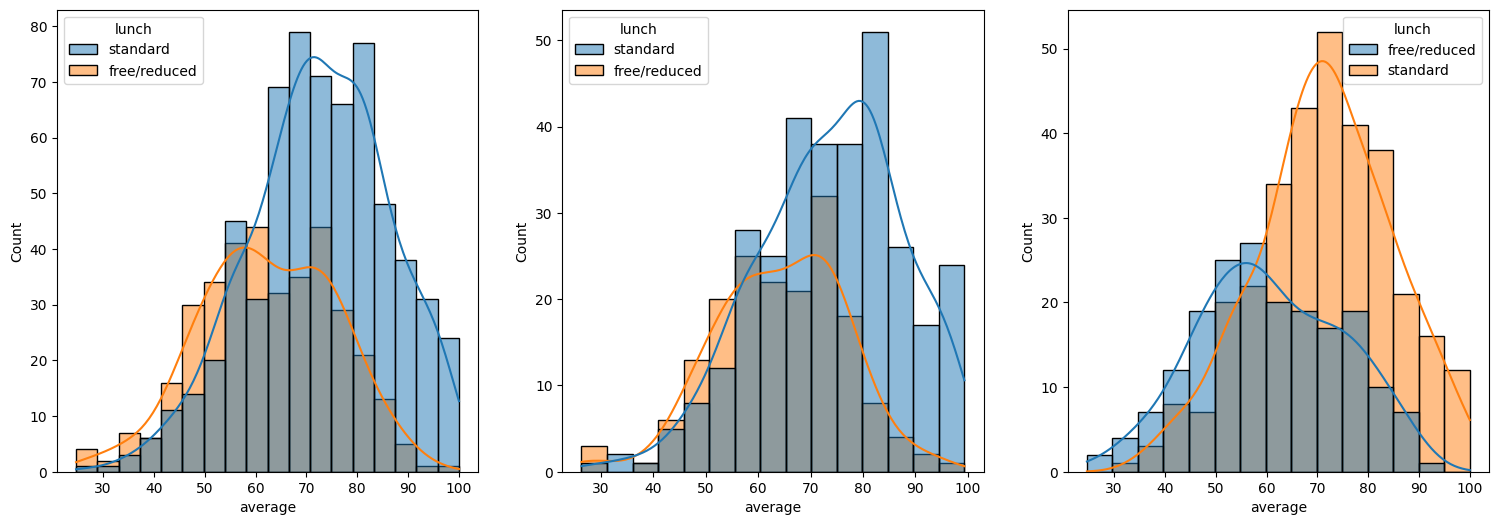

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')


# check whether girls perform better after the lunch
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')


# check whether boys perform better after the lunch
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

# insights 

##  standard lunch helps students to perform better in exams 
##  also it helps both male and female to perform better

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some college,standard,none,83,87,90,260,86.666667
1,female,group C,associate's degree,standard,none,64,70,74,208,69.333333
2,male,group B,some college,free/reduced,completed,67,61,64,192,64.000000
3,female,group C,associate's degree,standard,none,69,71,68,208,69.333333
4,female,group C,bachelor's degree,free/reduced,none,51,70,70,191,63.666667


<Axes: xlabel='average', ylabel='Count'>

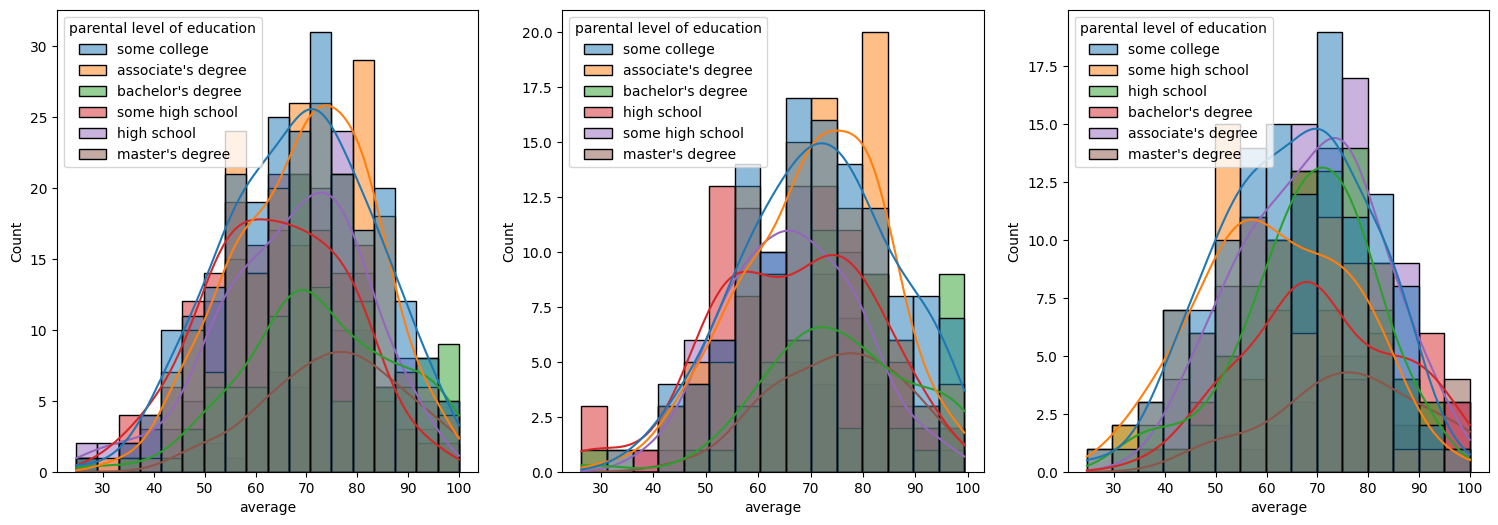

In [23]:
#check the same with the parental level of education 

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')


# check whether girls perform better after the lunch
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')


# check whether boys perform better after the lunch
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

# doing same thing for race ethnicity 

<Axes: xlabel='average', ylabel='Count'>

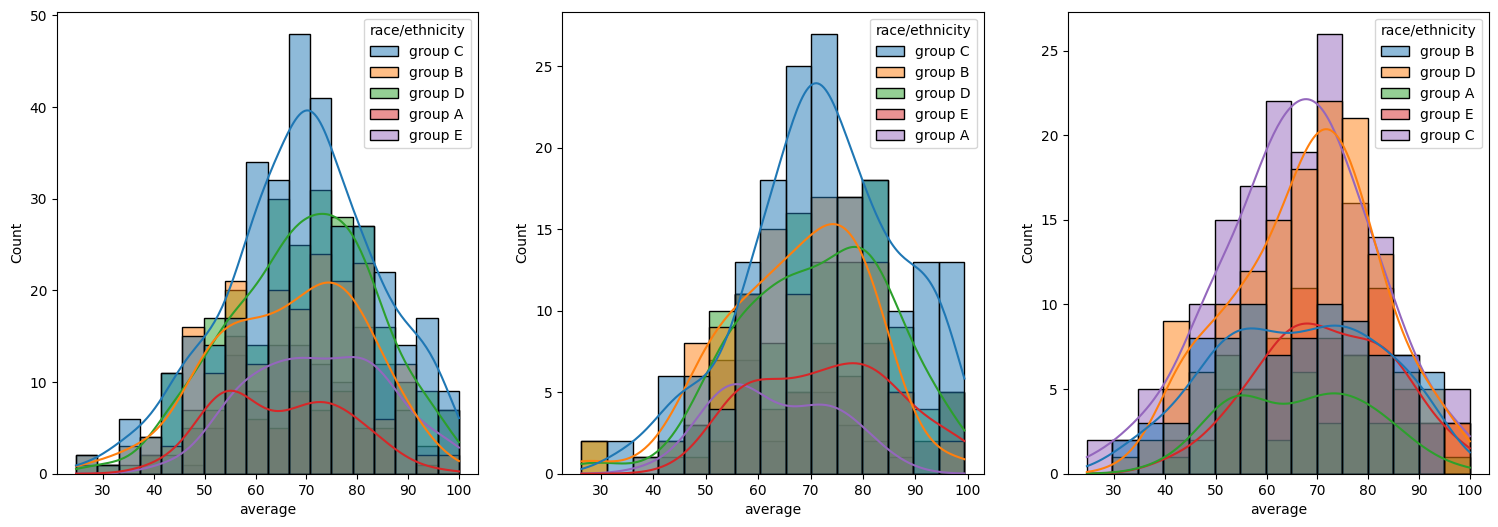

In [24]:
#check the same with the parental level of education 

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')


# check whether girls perform better after the lunch
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')


# check whether boys perform better after the lunch
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

# insights 

 ## students of group A and B tends to perform poor in examination 
 ## male and female both of group A and B perform poor in examination 

In [25]:
num=df.select_dtypes(type!='O')

TypeError: Cannot interpret 'True' as a data type

In [ ]:
sns.heatmap(df.corr(),annot=True)